In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib
from collections import Counter

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Data preprocessing

In [2]:
# Load dataset
df = pd.read_csv("creditcard.csv")
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print("Shape:", df.shape)

Shape: (284807, 31)


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 1- cleaning

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1081)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

# balancing

In [10]:
print(df['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


# we will try XGBoost model with this imbalanced data and see reasults 

# Exploratory Data Analysis

<Axes: >

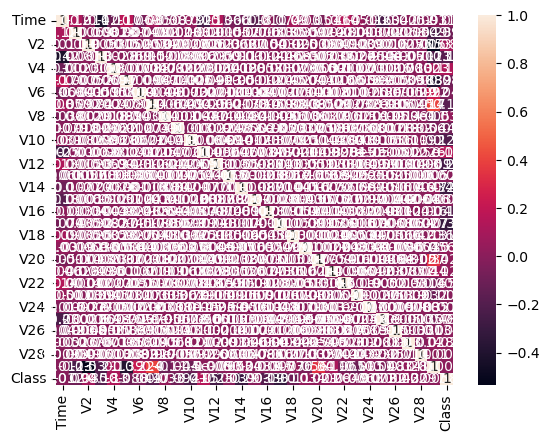

In [11]:
#make corr matrix 
sns.heatmap(df.corr(), annot=True)

In [12]:
#+1: A strong direct relationship (as one increases, the other increases)
#-1: A strong inverse relationship (as one increases, the other decreases)
#0: No clear linear relationship
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

# check if time has relation too

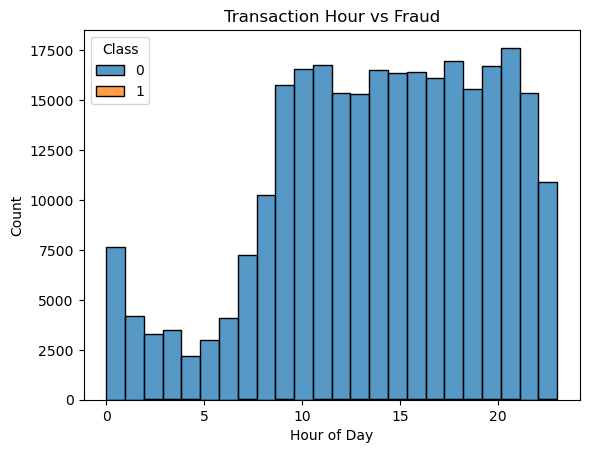

In [13]:
df['Hour'] = (df['Time'] // 3600) % 24

sns.histplot(data=df, x='Hour', hue='Class', multiple='stack', bins=24)
plt.title("Transaction Hour vs Fraud")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

#### so there is no relation between time and if transaction fraud or not cause this is the time
#### since the transaction occurred, not the actual time 

# 3- Feature engineering 

## first select features that have relation 
## based on corr matrix there is 14 attribute has a relation 

In [14]:
selected_features=['V17','V14','V10','V12','V11','V4','V2','V5','V9','V1','V18','V3','V7','V16']
x = df[selected_features]
y = df['Class']  # Labels: 0 = normal, 1 = fraud

# split data

In [20]:
X_train_full, x_test, y_train_full, y_test = train_test_split(
    x,y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
test_df = x_test.copy()
test_df.to_csv('test.csv', index=False)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)
print(Counter(y_train))

Counter({0: 181282, 1: 302})


In [ ]:
# Count majority and minority in training set
counter = Counter(y_train)
majority_count = counter[0]
target_minority_count = int(0.01 * (majority_count + int(0.01 * majority_count)))  # Approx. 1%

sampling_strategy = target_minority_count / majority_count

print(f"Calculated sampling_strategy: {sampling_strategy:.5f}")

# Apply SMOTE with calculated sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(Counter(y_resampled))

Calculated sampling_strategy: 0.01009
Counter({0: 181282, 1: 1829})


# train model 

In [17]:
model = XGBClassifier(use_label_encoder=False, 
                      eval_metric='logloss', 
                      random_state=42)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))


c:\Users\Kimo Store\anaconda3\envs\test\lib\site-packages\xgboost\core.py:158: UserWarning: [17:07:52] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45320
           1       0.96      0.84      0.90        76

    accuracy                           1.00     45396
   macro avg       0.98      0.92      0.95     45396
weighted avg       1.00      1.00      1.00     45396

ROC AUC: 0.9716213940632693


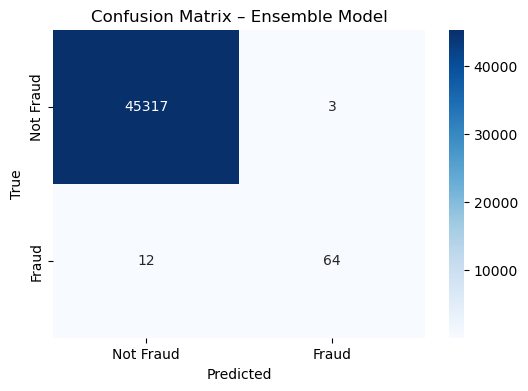

In [18]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Ensemble Model")
plt.show()

In [ ]:
# Save the model to a file
joblib.dump(model, 'xgboost_model.joblib')

['xgboost_model.joblib']